# winners

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [3]:
winners = pd.read_csv('/content/content/My Drive/Colab Notebooks/coder_school/week_4/assignments/data/06-world-cup/winners.csv')
winners.sample(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [4]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [5]:
# transform Attendance to int
def trans_att(x):
  result = 0
  h = 1
  s = len(x) - 1
  while(s >= 0):
    if x[s] != '.':
      result = result + int(x[s]) * h
      h = h*10
    s = s - 1
  return result

# test
trans_att('1.048.098')

1048098

In [6]:
winners.Attendance = winners.Attendance.apply(trans_att)
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


# phan tich

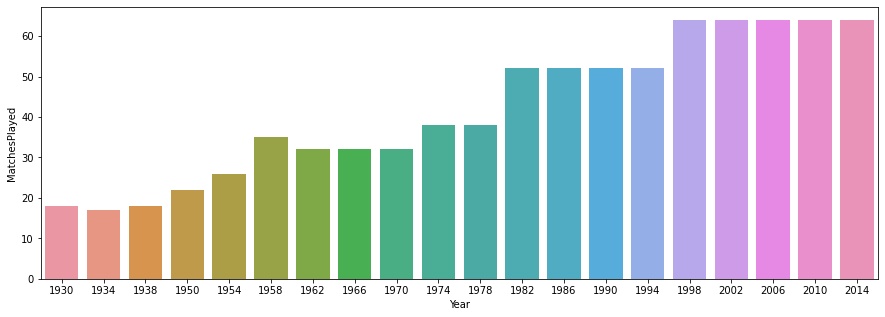

In [7]:
# so luong tran dau theo nam
plt.figure(figsize=(15, 5))
sns.barplot(data=winners, x='Year', y='MatchesPlayed')

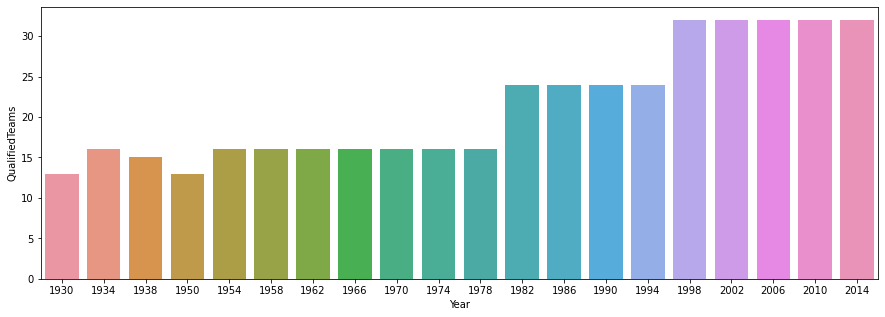

In [8]:
# so luong doi tham du theo nam
plt.figure(figsize=(15, 5))
sns.barplot(data=winners, x='Year', y='QualifiedTeams')

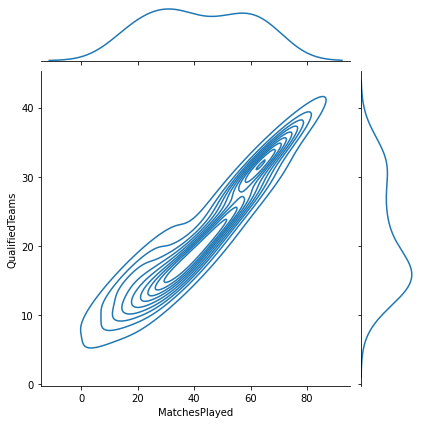

In [18]:
# tuong quan so doi tham du va so tran dau
sns.jointplot(data=winners, x='MatchesPlayed', y='QualifiedTeams', kind='kde')

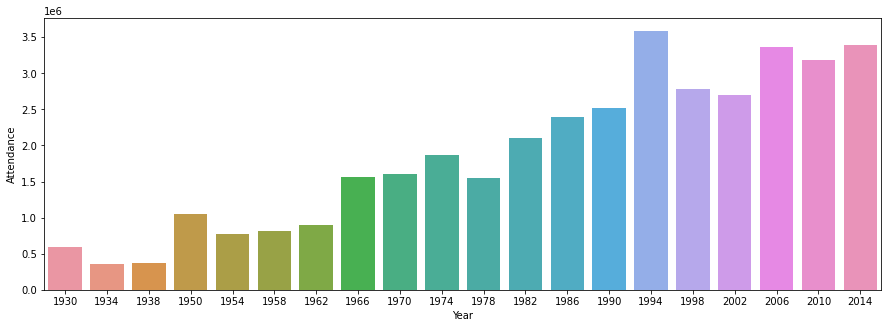

In [20]:
# so luong khan gia theo moi nam
plt.figure(figsize=(15, 5))
sns.barplot(data=winners, x='Year', y='Attendance')

In [21]:
# xem xet nam 1994
winners.loc[winners.Year == 1994]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538


In [22]:

# so luong khan gia trung binh theo tran
winners['score_ave'] = winners.Attendance / winners.MatchesPlayed
winners

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,score_ave
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,32808.277778
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,21352.941176
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,20872.222222
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,47511.181818
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,29561.807692
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,23423.142857
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,27911.625000
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,48847.968750
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,50124.218750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,49098.763158


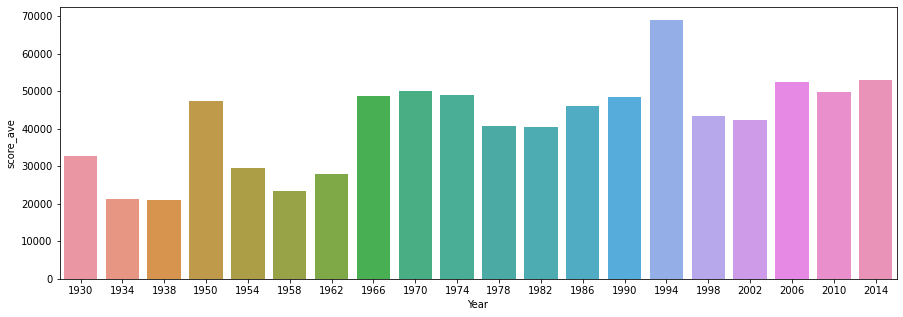

In [23]:
# so luong khan gia theo moi nam
plt.figure(figsize=(15, 5))
sns.barplot(data=winners, x='Year', y='score_ave')

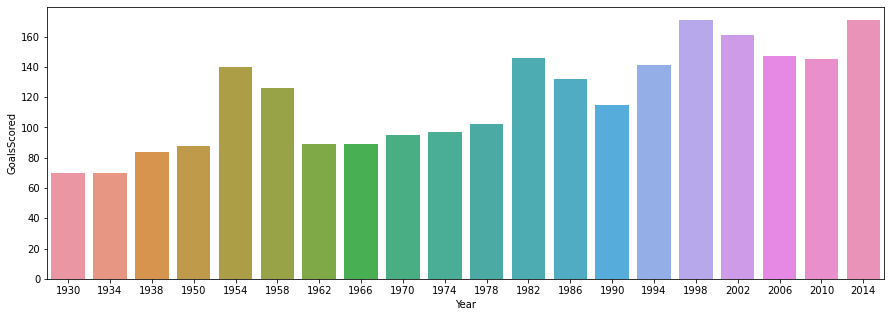

In [26]:
# so luong ban thang theo nam
plt.figure(figsize=(15, 5))
sns.barplot(data=winners, x='Year', y='GoalsScored')

In [27]:
# so luong ban thang trung binh theo tran dau
winners['goal_ave'] = winners.GoalsScored / winners.MatchesPlayed
winners

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,score_ave,goal_ave
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,32808.277778,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,21352.941176,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,20872.222222,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,47511.181818,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,29561.807692,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,23423.142857,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,27911.625000,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,48847.968750,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,50124.218750,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,49098.763158,2.552632


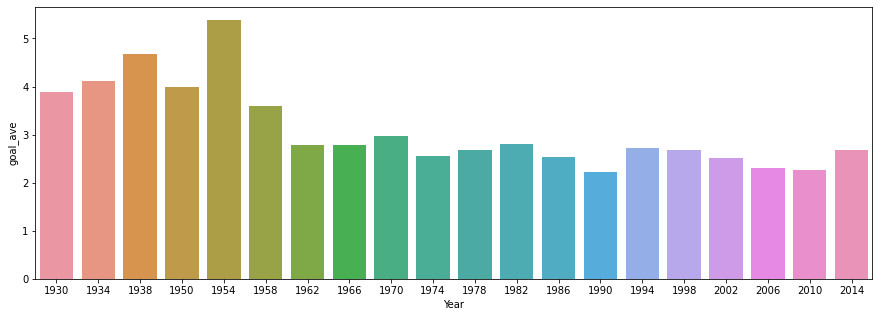

In [28]:
# so ban thang trung binh
plt.figure(figsize=(15, 5))
sns.barplot(data=winners, x='Year', y='goal_ave')

thong ke doi nhat va nhi

In [33]:
wins = winners.Winner.value_counts()
wins = wins.to_frame()
wins

,Winner
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2
Germany,1
Spain,1
England,1
France,1


In [34]:
runs = winners['Runners-Up'].value_counts()
runs = runs.to_frame()
runs

,Runners-Up
Netherlands,3
Germany FR,3
Argentina,3
Brazil,2
Italy,2
Hungary,2
Czechoslovakia,2
Sweden,1
Germany,1
France,1


In [38]:
w = wins.join(runs, how='outer')
w

,Winner,Runners-Up
Argentina,2.0,3.0
Brazil,5.0,2.0
Czechoslovakia,NaN,2.0
England,1.0,NaN
France,1.0,1.0
Germany,1.0,1.0
Germany FR,3.0,3.0
Hungary,NaN,2.0
Italy,4.0,2.0
Netherlands,NaN,3.0


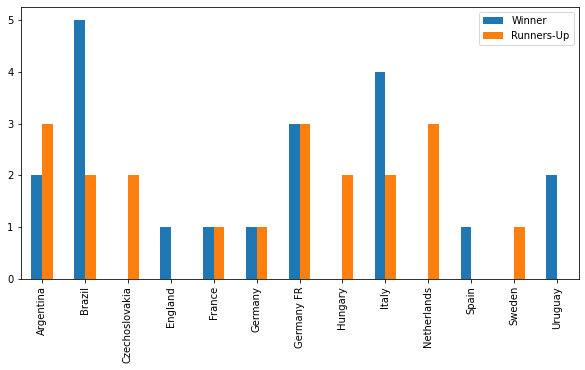

In [49]:
w.plot.bar(figsize=(10,5))